In [3]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv("titanic.csv")

In [5]:
df.shape

(891, 12)

In [7]:
#Data cleaning
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Removing Cabin column
df.drop(['Cabin'],inplace = True, axis=1)

In [16]:
#Replace null values from Age column with mean of age
mn_age = np.mean(df['Age'])
mn_age

29.69911764705882

In [17]:
df["Age"].fillna(mn_age, inplace=True)

In [18]:
#Replace null values from Embarked column with mode of data
df['Embarked'].fillna(df.Embarked.mode()[0],inplace = True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
#Convert Male and Female to numeric encoding
Sex = pd.get_dummies(df['Sex'],drop_first=True)

In [21]:
#Convert embarked values to numeric encoding
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [22]:
df.drop(["Name","Sex","Ticket","Embarked"], inplace=True, axis=1)

In [23]:
df= pd.concat([df,Sex,Embarked], axis = 1)
df

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  male  Q  \
0              1         0       3  22.000000      1      0   7.2500     1  0   
1              2         1       1  38.000000      1      0  71.2833     0  0   
2              3         1       3  26.000000      0      0   7.9250     0  0   
3              4         1       1  35.000000      1      0  53.1000     0  0   
4              5         0       3  35.000000      0      0   8.0500     1  0   
..           ...       ...     ...        ...    ...    ...      ...   ... ..   
886          887         0       2  27.000000      0      0  13.0000     1  0   
887          888         1       1  19.000000      0      0  30.0000     0  0   
888          889         0       3  29.699118      1      2  23.4500     0  0   
889          890         1       1  26.000000      0      0  30.0000     1  0   
890          891         0       3  32.000000      0      0   7.7500     1  1   

     S  
0    1  
1    0  
2    1  
3    1  
4    1  
..  ..  
886  1  
887  1  
888  1  
889  0  
890  0  

[891 rows x 10 columns]

<Axes: >

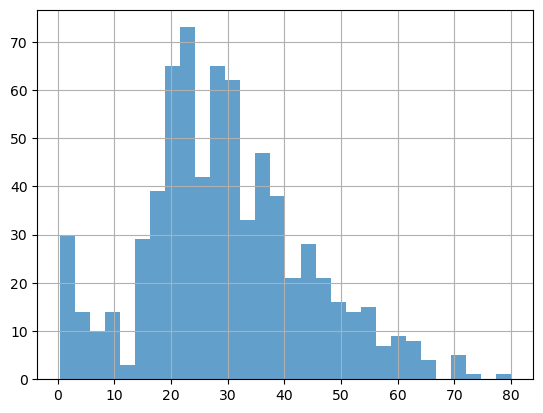

In [10]:
df["Age"].hist(bins=30,alpha=0.7)

<Axes: xlabel='Survived', ylabel='count'>

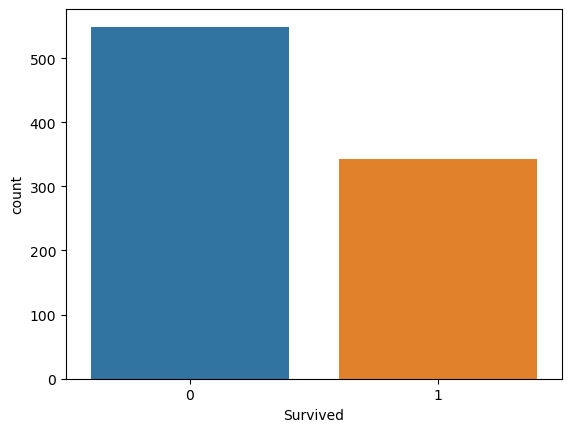

In [14]:
sns.countplot(x= "Survived" , data=df)

<Axes: xlabel='Survived', ylabel='count'>

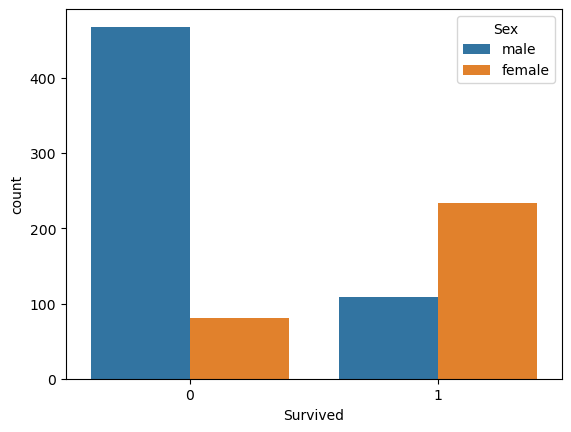

In [15]:
sns.countplot(x= 'Survived', hue= "Sex" , data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

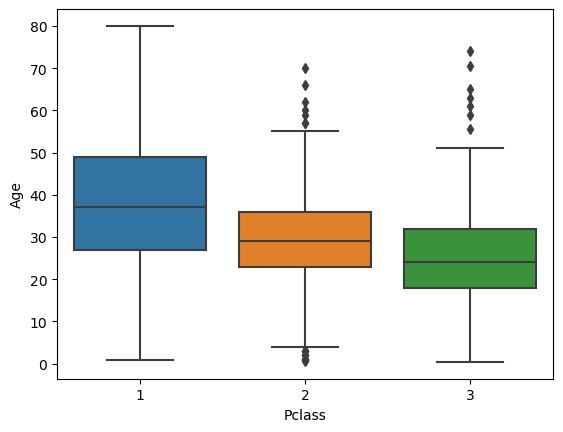

In [12]:
sns.boxplot(x="Pclass", y= "Age", data=df)